$\qquad$ $\qquad$ $\qquad$                                 **DAT405 Introduction to Data Science and AI, 2019-2020, Reading Period 3** <br />
$\qquad$ $\qquad$ $\qquad$                                 **Assignment 5: Reinforcement learning and Classification 2** <br />
$\qquad$ $\qquad$ $\qquad$                                 **Grader: Newton** <br />
$\qquad$ $\qquad$ $\qquad$                                 **Due Date: 23rd February, 23:59** <br />
$\qquad$ $\qquad$ $\qquad$                                 **Submitted by: Erling Hjermstad, 19990118-T454, erlingh@student.chalmers.se** <br />
$\qquad$ $\qquad$ $\qquad$ $\qquad$ $\qquad$ $\quad$       **Fredrik Lilliecreutz, 19970407-1795, fredriklilliecreutz@gmail.com** <br />
$\qquad$ $\qquad$ $\qquad$                                 **Hours spent: 10h each** <br />

---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.


Self-check 
1. Have you answered all questions to the best of your ability? 
2. Anything else you can easily check? (details, terminology, arguments, commenting for code etc.?) 

Grading will be based on a qualitative assessment of each assignment. It is important to:
*	Present clear arguments
*	Present the results in a pedagogical way
*	Show understanding of the topics (e.g, write a pseudocode) 
*	Give correct solutions
*	Make sure that the code is well commented 

**Again, as mentioned in general guidelines, all code should be written here. And this same ipython notebook file (RLAssignment.ipynb) should be submitted with answers and code written in it. NO SEPERATE FILE SHALL BE ACCEPTED.** 


# Primer

## Decision Making
The problem of **decision making under uncertainty** (commonly known as **reinforcement learning**) can be broken down into
two parts. First, how do we learn about the world? This involves both the
problem of modeling our initial uncertainty about the world, and that of drawing conclusions from evidence and our initial belief. Secondly, given what we
currently know about the world, how should we decide what to do, taking into
account future events and observations that may change our conclusions?
Typically, this will involve creating long-term plans covering possible future
eventualities. That is, when planning under uncertainty, we also need to take
into account what possible future knowledge could be generated when implementing our plans. Intuitively, executing plans which involve trying out new
things should give more information, but it is hard to tell whether this information will be beneficial. The choice between doing something which is already
known to produce good results and experiment with something new is known
as the **exploration-exploitation dilemma**.

## The exploration-exploitation trade-off

Consider the problem of selecting a restaurant to go to during a vacation.Lets say the
best restaurant you have found so far was **Les Epinards**. The food there is
usually to your taste and satisfactory. However, a well-known recommendations
website suggests that **King’s Arm** is really good! It is tempting to try it out. But
there is a risk involved. It may turn out to be much worse than **Les Epinards**,
in which case you will regret going there. On the other hand, it could also be
much better. What should you do?
It all depends on how much information you have about either restaurant,
and how many more days you’ll stay in town. If this is your last day, then it’s
probably a better idea to go to **Les Epinards**, unless you are expecting **King’s
Arm** to be significantly better. However, if you are going to stay there longer,
trying out **King’s Arm** is a good bet. If you are lucky, you will be getting much
better food for the remaining time, while otherwise you will have missed only
one good meal out of many, making the potential risk quite small.

## Overview
* To make things concrete, we will first focus on decision making under **no** uncertainity, i.e, given we have a world model, we can calculate the exact and optimal actions to take in it. We shall first introduce **Markov Decision Process (MDP)** as the world model. Then we give one algorithm (out of many) to solve it.


* Next, we will work through one type of reinforcement learning algorithm called Q-learning. Q-learning is an algorithm for making decisions under uncertainity, where uncertainity is over the possible world model (here MDP). It will find the optimal policy for the **unknown** MDP, assuming we do infinite exploration.

## Markov Decision Process

Markov Decision Process (MDP) provides a mathematical framework for modeling decision-making. It is a discrete time (distinct points in time) stochastic (randomly determined) process.

MDPs are made up of 4 parts:  
S: Finite set of states (Ex: s<sub>1</sub>, s<sub>2</sub> ... s<sub>N</sub>)  
A: Finite set of actions (Ex: North, South, East, West)  
P<sub>a</sub>(s,s'): Probability that action *a* in state *s* at time *t* will lead to state *s'* at time *t + 1*  
R<sub>a</sub>(s,s'): Immediate reward received after moving from state *s* to state *s'* by action *a*

An agent acts in an MDP at time *t*, by taking certain action *a* in state *s*, going to state *s'*, and getting a reward *r* from the world. It then repeats the process for certain no. of times, either finite or infinite.

We also include a $5^{th}$ part in the description of an MDP called Gamma $\gamma$.  
$\gamma$: The discount factor between 0 (inclusive) and 1 (exclusive). This determines how much credit you want to give to the future. If you think that the future reward is as important as the current reward you would set this to 0.99999. If you don't care about the future rewards you would set this to 0 and you only care about the current reward. For example, if your discount factor is 0.8 and after 5 steps you get a reward of 4 the present value of that reward is $0.8^4 * 5$ or ~2.

An MDP is a collection of states such that each state has a selection of actions associated with them. With each state-action pair comes a reward *r* (can be 0). Define a policy function: $\pi: s \rightarrow a$, which tells which action to take at each state.
  
We now use the famous dynamic programming equation, also known as Bellman Equation, to define optimality in an MDP. The following equation defines what we call the **value function** of state *s* following some fixed policy $\pi$:  

$$V^\pi(s) = \sum_{s'} P_{\pi(s)}(s,s') [R_{\pi(s)}(s,s') + \gamma V^\pi(s')]$$

We call $V^\pi$ as the value of policy $\pi$.  
  
Now, to find the **optimal** policy you will need to find the action that gives the highest reward.  

$$V^*(s) = max_a \sum_{s'} P_a(s,s') [R_a(s,s') + \gamma V^*(s')]$$

A real world example would be an inventory control system. Your states would be the amount of items you have in stock. Your actions would be the amount to order. The discrete time would be the days of the month. The reward would be the profit.  

A major drawback of MDPs is called the "Curse of Dimensionality". This states that the more states/actions you have the more computational difficult it is to solve.   


## Question 1 (2 points)

For the first question of the notebook, we give a quick example of an MDP. We would to see if you can put the definitions above into practice.

**Question a**: Given the following deterministic MDP (you select North, you move North), what is the optimal policy (path with the most points)?
  
*Notes*:  
  * The number in the box is the reward.  
  * Once you hit the end you are done. (Absorbing state)
  * S is the starting point.  
  * F is the ending point.  
  * Use N for North, E for East, S for South, and W for West. Not all actions are available at each state, for example, you can't choose N and W at starting state, as there exists no valid next states in those directions.  
  * Pass the directions as a single string. Ex: ESWN will make a circle.  
  


| | | |
|----------|----------|---------|
|S|1|1|
|1 |0|1|  
|-1|-1|0|  
|0 |0|F|

>**Answer a**: Interestingy the answer is independent of the factor $\gamma$. The optimal policy is to go back and forth between two states which give a reward of 1 as this yields an infinite score. However, this sequence will never terminate and the game never finish.
>
>With $\gamma > 0$ we will start east and get trapped in the following 1s.
>E.g. E followed by EWEWEWEWEW..... or a similar pattern of 1s.  
>With $\gamma = 0$ we might start south as we disregard the future rewards, and thus don't care that our next choice will give zero reward instead of 1. However we might also head east as this yields the same immediate reward. What action is taken depends on the implementation.
>
>Policy for $\gamma = 0$:
> | | | |
> |--|--|--|
> |E/S|E|S/W|
> |N/E|N/E/W|N|
> |N|N/E/S|N|
> |E|E/W|N/W|
>
>
>Policy for $\gamma > 0$:
> | | | |
> |--|--|--|
> |E|E|S/W|
> |N/E|N/E|N|
> |N|N/E|N|
> |E|E|N|
>
> Where '/' symbolizes equality between actions.
>
>If we are only allowed to visit each box once the answer changes. Then the best policy is SENESS as it visits all boxes with reward 1 and no negative boxes, unless we have a discount factor $\gamma < 0.75$ where EESSS is the best policy since we get more rewards faster.

Question b,c will attempt to firm up your knowledge of the parts of an MDP. Just remember that for a state denoted by (x,y), state N/E/S/W to that are (x,y-1),(x+1,y),(x,y+1),(x-1,y) respectively. We take (0,0) as the starting state S.

**Question b:** What is the probability of going from state (1,0) to state (2,0) using action E ? ( i.e,  $P_E((1,0),(2,0))$ )

**Question c:** What is the reward for moving from state (1,0) to state (2,0) ? ( i.e, $R_E((1,0),(2,0))$ )

>**Answer b**: The game is deterministic, so the probability of ending in state (2, 0) by choosing action E in (1, 0) is 1. There is no chance involved.
>
>**Answer c**: The reward is given by the number in box the box we arrive in. Here it is box (2, 0), so the reward is 1.

## Value Iteration

The value iteration is one algorithm that can be used to find the optimal policy ($\pi^*$). Note that for any policy $\pi^*$ to be optimal, it must satisfy the Bellman equation for optimal value function $V^*$. For any candidate $V^*$, it must be such that plugging it in the RHS (right-hand-side) of Bellman equation should give the same $V^*$ again (by the recursive nature of this equation). This property will form the basis of our algorithm. Essentially, due to certain mathematical results, repeated application of RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of Bellman equation for optimal value function will also lead to optimal value function, we can then extract the optimal actions by simply noting the actions that satisfy the equation.    

The value function is based on the Bellman Equation for optimal value, which we recall here:  
$$V^*(s) = max_a \sum_{s'} P_a(s,s') [R_a(s,s') + \gamma V^*(s')]$$

Example: Below is a 3x3 grid. We are going to walk through a few iterations to firm up your understanding. Lets assume this time that success of taking any action is 0.8. Meaning if we take E from a valid state (x,y), we will go (x+1,y) 80 percent of time, but remain in same state the remaining time. We will have a discount factor ($\gamma$) of 0.9. Assume $V^0(s')=0$ for all s'. 

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: It is trivial, V(s) becomes the $max_a \sum_{s'} P_a(s,s') R_a(s,s')$ since $V^0$ was zero for s'.

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0): We find the expected value of each move:  
Action N: 0  
Action E: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action S: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action W: 0

Hence any action between E and S would have been best at this stage.

Similarly for cell (1,0):

Action S: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action S is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2 (4 points)
Please code the value iteration algorithm just described here, and show the optimal value function of the above 3x3 grid problem at convergence.

>**Answer**:

In [3]:
import numpy as np

rewards = np.array([[0, 0, 0], [0, 10, 0], [0, 0, 0]])
success_rate = 0.8
discount_factor = 0.9 #gamma
tol = 1e-4 #Threshold to stop iterating. Stops when changes are less than this measured in 2-norm^2


value_function =  np.zeros_like(rewards, dtype=float)
prev_values = np.ones_like(value_function) #just something more than tol different from value_function so the loop will run atleast once
optimal_action = np.zeros_like(value_function, dtype=object)


sizeX = len(value_function[0])
sizeY = len(value_function)

actions = {'N' : {'x' : 0, 'y' : -1}, 'E' : {'x' : 1, 'y' : 0}, 'S' : {'x' : 0, 'y' : 1}, 'W' : {'x' : -1, 'y' : 0}}

counter = 0
while np.sum(np.square(value_function - prev_values)) > tol:
    counter += 1
    prev_values = np.copy(value_function)
    for y in range(sizeY):
        for x in range(sizeX):
            max_value = -1
            best_action = ''            
            for dir in actions:
                if x + actions[dir]['x'] >= sizeX or x + actions[dir]['x'] < 0:
                    continue #action out of bounds
                if y + actions[dir]['y'] >= sizeY or y + actions[dir]['y'] < 0:
                    continue #action out of bounds
                
                #continously updating value_function so need to get values from prev_values
                value = success_rate*(rewards[y + actions[dir]['y'], x + actions[dir]['x']] + discount_factor*prev_values[y + actions[dir]['y'], x + actions[dir]['x']]) + (1 - success_rate)*(rewards[y, x] + discount_factor*prev_values[y, x])
                # print("Pos:",i,j,"Action:", dir, "Value:", value)

                if  value > max_value:
                    max_value = value
                    best_action = dir
                elif value == max_value:
                    best_action += '/' + dir

            value_function[y, x] = max_value
            optimal_action[y, x] = best_action            

print("Optimal value function:")
print(value_function)
print("Optimal policy function:")
print(optimal_action)
print("Number of iterations:", counter)


Optimal value function:
[[45.58472762 51.9198559  45.58472762]
 [51.9198559  48.02375201 51.9198559 ]
 [45.58472762 51.9198559  45.58472762]]
Optimal policy function:
[['E/S' 'S' 'S/W']
 ['E' 'N/E/S/W' 'W']
 ['N/E' 'N' 'N/W']]
Number of iterations: 71


> The optimal value function which maps states (postions) to values is on the form
> | | | |
> |---|---|---|
> |45.6|51.9|45.6|
> |51.9|48.0|51.9|
> |45.6|51.9|45.6|
>
>
> Thus the optimal policy function which maps states (positions) to actions is on the form
> | | | |
> |---|---|---|
> |E/S|S|S/W|
> |E|N/E/S/W|W|
> |N/E|N|N/W|
>
> Where '/' symbolizes equality between actions.

## Reinforcement Learning (RL)
Until now, we understood that knowing the MDP, specifically $P_a(s,s')$ and $R_a(s,s')$ allows us to efficiently find the optimal policy using value iteration algorithm, but RL or decision making under uncertainity arises from the question of making optimal decisions without knowing the true world model (MDP in this case).

So far we have defined the value of a state $V^\pi$, let us define the value of an action, $Q^\pi$:

$$Q^\pi(s,a) = \sum_{s'} P_a(s,s') [R_a(s,s') + \gamma V^\pi(s')]$$

i.e, the value of taking action *a* from state *s* and then following $\pi$ onwards. Similarly, the optimal Q-value equation is:

$$Q^*(s,a) = \sum_{s'} P_a(s,s') [R_a(s,s') + \gamma V^*(s')]$$

## Q-learning

Q-learning algorithm can be used by an agent unaware of its surroundings (unknown MDP). All it can do is take an action *a* at time *t* from state *s* and observe the reward *r* and next state *s'*, and repeat this process again. So how it can learn to act optimally under such uninformative conditions ? Answer is using Q-learning. Without going into its justification, we simply state the main-update rule of this algorithm below:

![alt text](https://chalmersuniversity.box.com/shared/static/5anbos4s9luoayb32jk6w3wy3w4jk3g3.png)

Where we simply maintain Q(s,a) value for each state-action pair in a table. It is proven to converge to the optimal policy of the underlying unknown MDP for certain values of learning rate $\alpha$. For our case, we set a constant $\alpha=0.1$.

## OpenAI Gym

We shall use already available simulators for different environments (world) using the popular OpenAI Gym library. It just implements [differnt types of simulators](https://gym.openai.com/) including ATARI games. Although here we will only focus on simple ones, such as [Chain enviroment](https://gym.openai.com/envs/NChain-v0/).

![alt text](https://chalmersuniversity.box.com/shared/static/6tthbzhpofq9gzlowhr3w8if0xvyxb2b.jpg)

## Question 3 (1 point)
Basically, there are 5 states, and two actions 'a' and 'b'. Each transition (s,a,s') is noted with its corresponding reward. You are to first familiarize with the framework using its [documentation](http://gym.openai.com/docs/), and then implement the Q-learning algorithm for the Chain enviroment (called 'NChain-v0') using default parameters. Finally print the $Q^*$ table at convergence. Take $\gamma=0.95$. You can refer to the Q-learning Jupyter notebook shown in class, uploaded on Canvas.


>**Answer:**

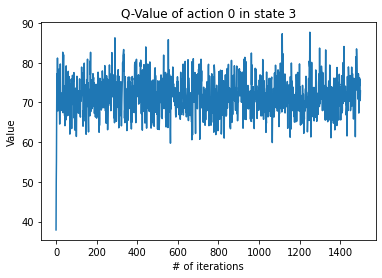

array([[55.01127554, 53.60247797],
       [58.1299195 , 54.86465834],
       [66.25433246, 58.18234438],
       [72.92469948, 60.83355567],
       [85.7497012 , 55.7919033 ]])

In [70]:
import gym
import gym_toytext #resolve legacy issues with NChain-v0
import random
import matplotlib.pyplot as plt


gamma = 0.95
learning_rate = 0.1

epsilon = 0.1 #how often we explore

num_episodes = 1500 #how many iterations of the game is to be played. 1 game = 1000 choices

env = gym.make('NChain-v0')

num_actions = env.action_space.n #two possible actions. 0 or 1 / a or b / forward or back to start
num_states = env.observation_space.n #5 possible states

Q = np.zeros([num_states, num_actions]) #Q table
prevQ = np.ones_like(Q)

line = []

##Code below is from lecture
for i in range(num_episodes):
	state = env.reset()
	done = False
	prevQ = np.copy(Q)

	while done == False:
        # First we select an action:
		if random.uniform(0, 1) < epsilon: # Flip a skewed coin
			action = env.action_space.sample() # Explore action space
		else:
			action = np.argmax(Q[state,:]) # Exploit learned values
        # Then we perform the action and receive the feedback from the environment
		new_state, reward, done, info = env.step(action)
        # Finally we learn from the experience by updating the Q-value of the selected action
		prediction_error = reward + gamma*np.max(Q[new_state,:]) - Q[state, action]
		Q[state, action] += learning_rate*prediction_error 
		state = new_state

	line.append(Q[3, 0])

plt.plot(list(range(num_episodes)), line)
plt.xlabel("# of iterations")
plt.ylabel("Value")
plt.title("Q-Value of action 0 in state 3")
plt.show()


env.close()
Q


>Can see from the output that moving forward is always the recommended action, and increasingly so as we move along the chain.
>When letting the algorithm run until convergence, it runs forever. The Q-table has quite big variance from iteration to iteration, but as can be seen from the plot for action 0 in state 3 it quickly stabilizes around the same value. This is also the case for the other state-action pairs.


## Question 4 (2 points)

a. Verify that the optimal $Q^*$ value obtained using Q-learning is same as the optimal value function $V^*$ for the corresponding MDP's optimal action. You would have to first define the MDP corresponding to Chain enviroment.

b. What is the importance of exploration in RL ? Explain with an example.


>**Answer a:**
>Were not able to find the default values of NChain-v0 as it has been removed from Gym and its sourcecode it also been removed from the gym repo on github. Assuming $\gamma = 0.95$, the probabilities are $P_{\text{Forward}}(n, n+1) = 95 \% $, $P_{\text{back to start}}(n, 0) = 95 \% $, $P_{\text{Forward}}(n, 0) = 5 \% $ and $P_{\text{back to start}}(n, n+1) = 5 \%$. Given rewards as per the drawing this gives a $V^*(s)$ as can be seen at the ouput of following script:


In [13]:
import numpy as np

rewards = np.array([[0, 2], [0, 2], [0, 2], [0, 2], [10, 2]])
success_rate = 0.95
discount_factor = 0.9
tol = 1e-4 #Threshold to stop iterating. Stops when changes are less than this measured in 2-norm^2


value_function =  np.zeros_like(rewards, dtype=float)
prev_values = np.ones_like(value_function) #just something more than tol different from value_function so the loop will run atleast once

sizeX = len(value_function[0])
sizeY = len(value_function)


counter = 0
while np.sum(np.square(value_function - prev_values)) > tol:
    counter += 1
    prev_values = np.copy(value_function)
    for state in range(sizeY):
        moving_on_reward = rewards[state, 0] + discount_factor*max(prev_values[min(4, state + 1)])  
        back_to_start_reward = rewards[state, 1] + discount_factor*max(prev_values[0])       
        #action 0/forward
        value_function[state, 0] = success_rate*moving_on_reward + (1 - success_rate)*back_to_start_reward    
        #action 1/back to start
        value_function[state, 1] = success_rate*back_to_start_reward + (1 - success_rate)*moving_on_reward
        
           

print("Optimal value function:")
print(value_function)
print("Number of iterations:", counter)


Optimal value function:
[[51.74207028 48.73249232]
 [57.67982084 49.04500551]
 [64.62455834 49.41051801]
 [72.74705834 49.83801801]
 [82.24705834 50.33801801]]
Number of iterations: 76


>Can see that the Q-table and the $V^*$-table are similar.


>**Answer b:**
>If never explore potentially huge rewards might go undiscovered. Take the NChain environment, if we only know about the reward of going back to start, we will always choose this as there are no known rewards of moving along the chain. However, as we know the optimal strategy is to explore and find the big reward at the end of the chain. This has parallels to life. Maybe it is worth it to explore and deviate from ones habits from time to time to gain higher rewards in life. For example exploring new job opportunities in a new city to gain a higher salary and standard of living. Or you might dislike the new city and realised that your life satifaction was better in your previous city. You will never know unless you start exploring new opportunities, however too much exploring might also reduce the standard of living / rewards in life.

## Question 5 (1 point)

Briefly discuss the k-armed bandit problem formulation and it's distinguishing feature as a special case of the reinforcement learning problem formulation.

>**Answer:**
>The K-armed bandit problem is an exploration/explotation problem just like the NChain. Imagine K armed bandit slot machines in a casino, each with an unknown machine-specific probability distribution for determining the reward of playing on the machine. The problem is how to maximize the reward from playing N times on the machines. By exploring a player can get an idea of which machines have the most favorable distributions and exploit this information in the remaining plays. It is an MDP with just one state and K actions and unknown rewards. Regardless of what action we take, we still are in the same state and all actions are available. This is a special feature of the K-armed bandit problem. The main challenge is to find the balance between exploring and exploiting.

## Note

* Until now, we have described algorithms for when no. of states and actions are finite. In coming weeks, you will be taught how to extend these methods to continous state enviroments like ATARI games.

# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf